# Meteorite Landing dataset



This dataset was downloaded from the NASA site dedicated to open data at the address: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

#### The Data

The dataset contains the following variables:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics. 

5. `mass (g):` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines `reclat` and `reclong` values.

Exploratory Questions/ maps/charts-
1. Make a map with distinct relative size markers on the world map
2. Slice the dataset accoding to mass and create heatmap. 
3. Geolocation on geopandas or folium. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

met_df = pd.read_csv('D:\meteorite-landing\Meteorite_landings.csv')
met_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [8]:
met_df.shape

(45716, 10)

In [4]:
met_df.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long', 'mass (g)':'mass'}, inplace=True)
met_df.head()
met_df['year'] = met_df['year'].astype(pd.Int64Dtype())
correct_lat_long_df = met_df[(met_df.lat != 0.0) & (met_df.long != 0.0)]
correct_lat_long_df['year']=met_df['year']
correct_lat_long_df['year'].dtype
correct_lat_long_df.sort_values(by=['year'],inplace=True)
correct_lat_long_df
#correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]
#correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]
#correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]
#correct_lat_long_df

C:\Users\tanip\AppData\Local\Temp\ipykernel_66420\3240805923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_lat_long_df['year']=met_df['year']
C:\Users\tanip\AppData\Local\Temp\ipykernel_66420\3240805923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_lat_long_df.sort_values(by=['year'],inplace=True)


,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725, 130.75)"
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,920,42.51667,12.51667,"(42.51667, 12.51667)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)"
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333,"(39.0, -0.03333)"
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667,"(-39.1, -67.06667)"
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,<NA>,49.41667,21.70000,"(49.41667, 21.7)"
38335,Wiltshire,56143,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000,"(51.14967, -1.81)"


In [5]:
correct_lat_long_df.isnull().sum()

name              0
id                0
nametype          0
class             0
mass            131
fall              0
year            263
lat            7315
long           7315
GeoLocation    7315
dtype: int64

In [7]:
correct_lat_long_df[correct_lat_long_df['mass'].isnull()==True]
correct_lat_long_df['mass'].describe()

count    3.914700e+04
mean     1.539495e+04
std      6.204445e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.430000e+01
75%      2.185300e+02
max      6.000000e+07
Name: mass, dtype: float64

In [10]:
#correct_lat_long_df
correct_lat_long_df[correct_lat_long_df.isna().any(axis=1)]
correct_lat_long_df = correct_lat_long_df.dropna()

In [11]:
correct_lat_long_df.shape

(31705, 10)



row_indices = correct_lat_long_df[correct_lat_long_df['mass (g)'].isnull() == True].index
missing_mass_values=correct_lat_long_df.loc[row_indices,'mass (g)']
median_mass = correct_lat_long_df['mass (g)'].median()
correct_lat_long_df.loc[row_indices, 'mass (g)'] = median_mass
correct_lat_long_df.loc[row_indices,:]
correct_lat_long_df.loc[row_indices,'mass (g)'].describe()
correct_lat_long_df['mass (g)'].describe()
test=correct_lat_long_df[correct_lat_long_df["mass (g)"]>0]
test.describe()
test.shape

figure = plt.figure(figsize=(12,8))
    
sns.scatterplot(data= correct_lat_long_df,x="mass",y="class",hue="fall")
plt.title("A scatterplot of meteorite of Mass(g) by year ")
#plt.legend(prop=dict(size=10))
    
#plt.tight_layout()
plt.show()

In [16]:
#sns.distplot(data=correct_lat_long_df)
years_val = correct_lat_long_df['year'].value_counts()
years_val

1979    3045
1988    2295
2003    1714
1999    1578
1990    1506
        ... 
1600       1
1583       1
1575       1
1491       1
2013       1
Name: year, Length: 252, dtype: Int64

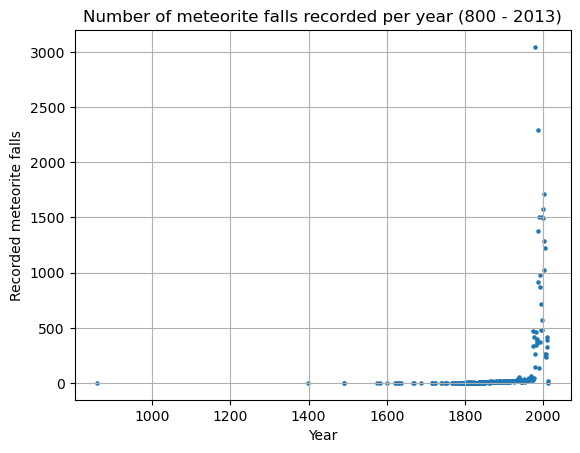

In [17]:
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 5)
plt.title('Number of meteorite falls recorded per year (800 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

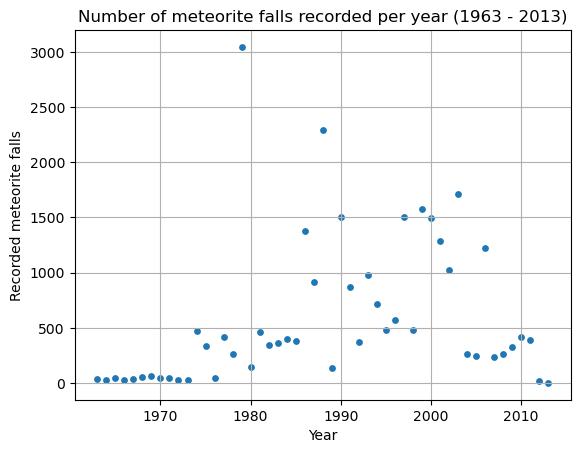

In [19]:
df = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1963) & (correct_lat_long_df
['year'] <= 2013)]

years_val = df['year'].value_counts()
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 15)
plt.title('Number of meteorite falls recorded per year (1963 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()


Text(0.5, 1.0, 'Meteorite falls recorded per mass (mg)')

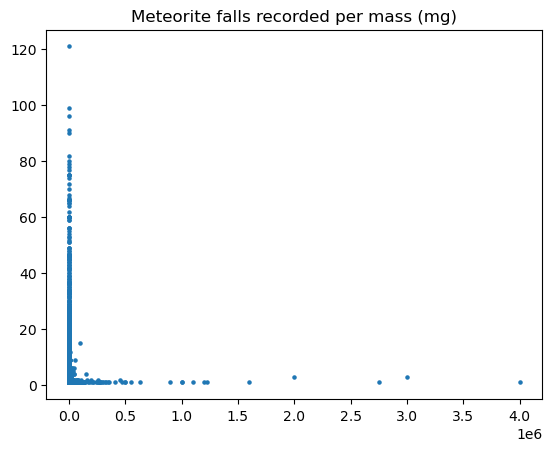

In [21]:
mass_val = df['mass'].value_counts()
x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 5)
plt.title("Meteorite falls recorded per mass (mg)")

Text(0, 0.5, 'Quantity counted')

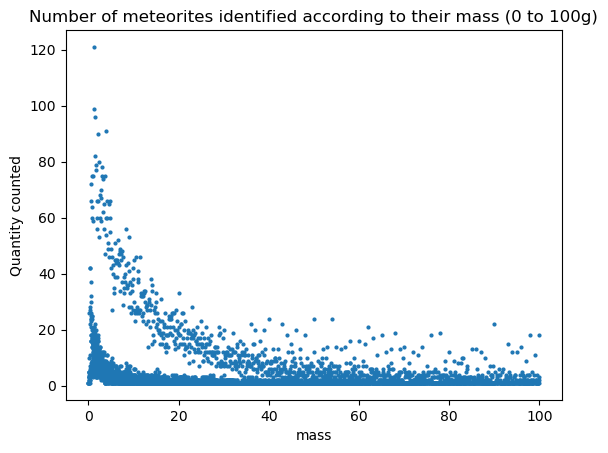

In [23]:
df_mass = df.loc[(df['mass'] > 0) & (df['mass'] <= 100)]
mass_val = df_mass['mass'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass (0 to 100g)')
plt.xlabel('mass')
plt.ylabel('Quantity counted')